# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [78]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

> ### 1.1. Code for the distance function 

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    
    p1=np.array(Cluster_Centroids)
    p2=np.array(Data_points)
    i=0
    j=0
    x=len(p2)
    y=len(p1)
    matrix=[]
    for j in range (0,y):
        for i in range (0,x) :
            if(Distance_Type=='Ecluidian'):
                Cluster_Distance= np.linalg.norm(p1[j] - p2[i])
                matrix.append(Cluster_Distance)
    
    
    
    
    matrix=np.reshape(matrix, (y, x))        
    return matrix



> ### 1.2. Code for K means function 

In [3]:

        
# df = pd.read_csv('Customer data.csv', usecols = ['Marital status','Age'])
# df
# X_feat=df.values
# datapoints=X_feat
# index= np.random.choice(len(datapoints), 2, replace=False)
# centroids = datapoints[index]

# for itr in range (0,100):
#     distances_to_centroids=GUC_Distance(  centroids,X_feat,'Ecluidian')
#     cluster_assignment=np.argmin(distances_to_centroids,axis=0)
#     new_centroids = np.array([datapoints[cluster_assignment == i].mean(axis = 0) for i in range((2))])
    
    
#     if np.all(centroids == new_centroids):
#         break
    
#     centroids = new_centroids
# print(centroids)
# meansquardist= 0
# for i in range(2):
#     cluster_data = datapoints[cluster_assignment == i]
#     distances =GUC_Distance(  [centroids[i]],cluster_data,'Ecluidian')
#     meansquardist += np.sum(distances ** 2) 










> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [4]:
def GUC_Kmean ( Data_points, Number_of_Clusters ):
    datapoints=Data_points
    index= np.random.choice(len(datapoints), Number_of_Clusters, replace=False)
    centroids = datapoints[index]
    
    
    
    for itr in range (0,100):
        distances_to_centroids=GUC_Distance(  centroids,datapoints,'Ecluidian')
        cluster_assignment=np.argmin(distances_to_centroids,axis=0)
        new_centroids = np.array([datapoints[cluster_assignment == i].mean(axis = 0) for i in range(( Number_of_Clusters))])
    
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    squardist= 0
    for i in range( Number_of_Clusters):
        cluster_data = datapoints[cluster_assignment == i]
        distances =GUC_Distance(  [centroids[i]],cluster_data,'Ecluidian')
        squardist += np.sum((distances ** 2))
        
        
        
        
    
    return [ new_centroids,cluster_assignment,squardist] 

In [5]:
# df = pd.read_csv('Customer data.csv', usecols = ['Marital status','Age'])
# df
# X_feat=df.values
# datapoints=X_feat
# GUC_Kmean(datapoints,3)

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,centroids,labels,num_clusters=0):
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels==i,0],X[labels==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(centroids[i][0],centroids[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

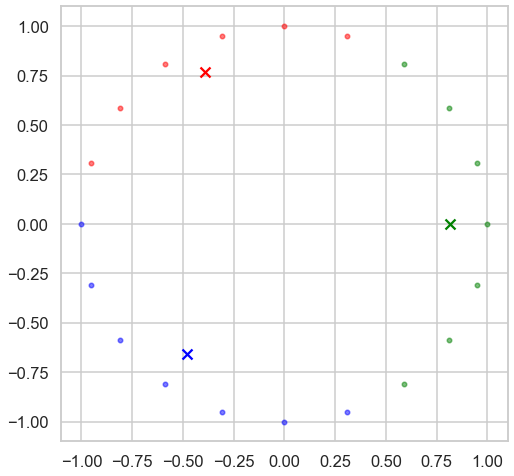

In [8]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
[ new_centroids,cluster_assignment,distortion  ]=GUC_Kmean(X,3)
display_cluster(X,new_centroids,cluster_assignment,3)


# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
# display_cluster(X)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

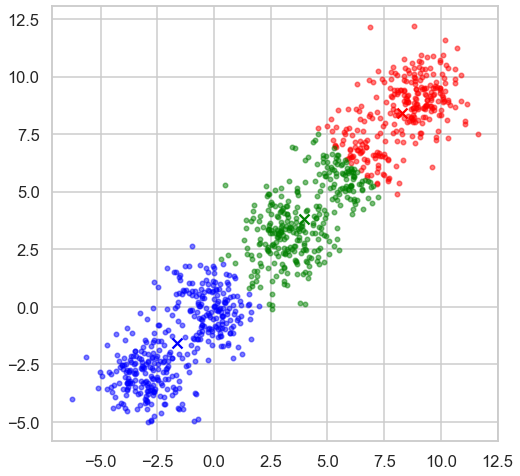

In [9]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
[ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,3)

display_cluster(X,new_centroids,cluster_assignment,3)

#### 2.3. Example 3 : moons Data Gen and display 

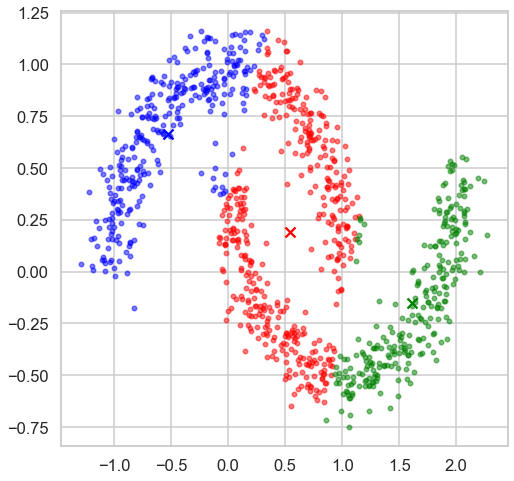

In [10]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
[ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,3)

display_cluster(X,new_centroids,cluster_assignment,3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

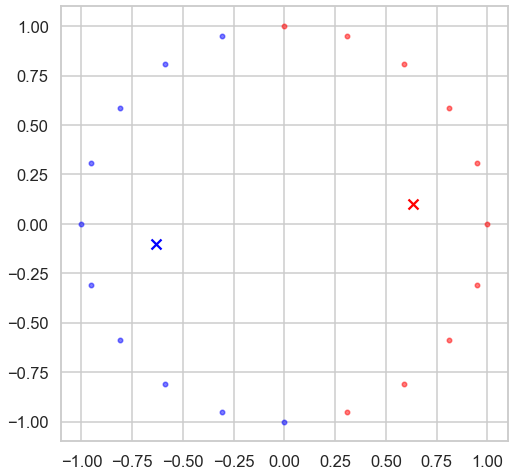

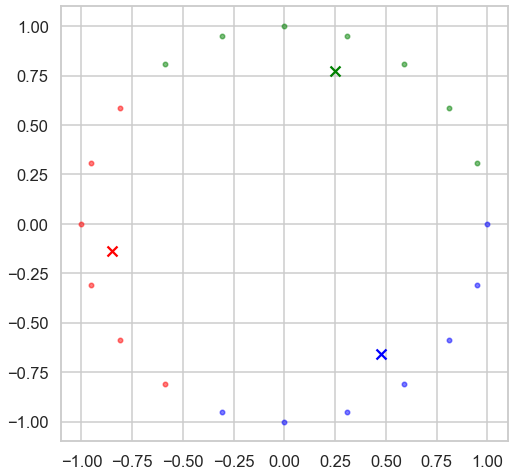

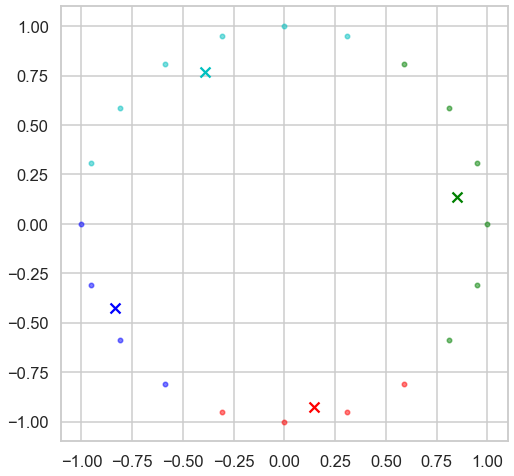

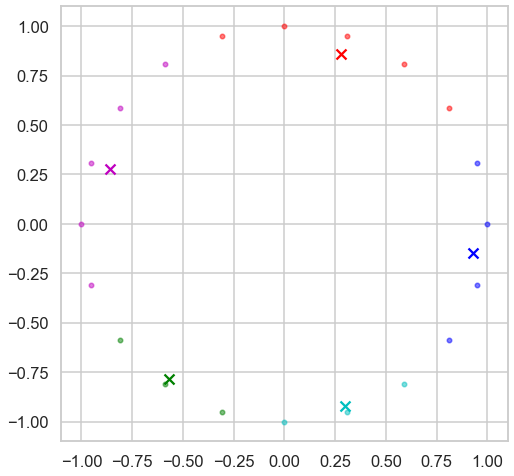

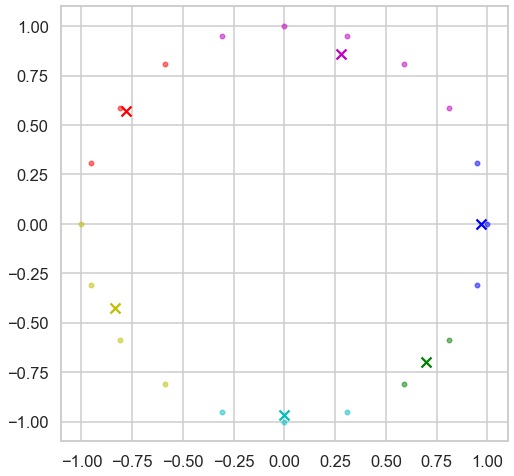

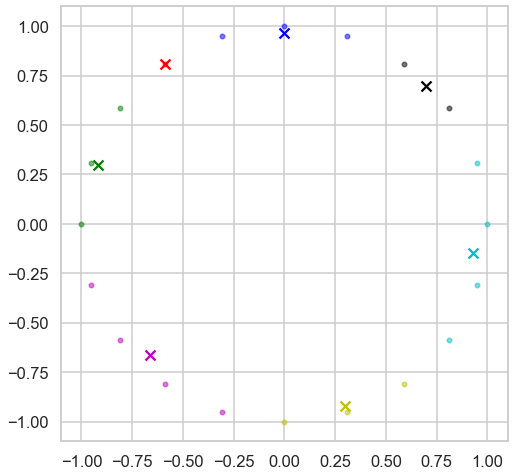

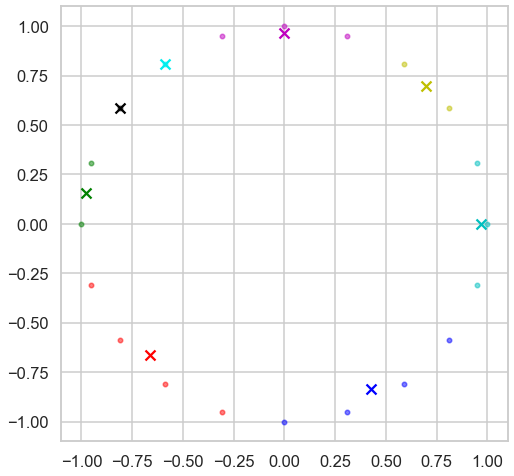

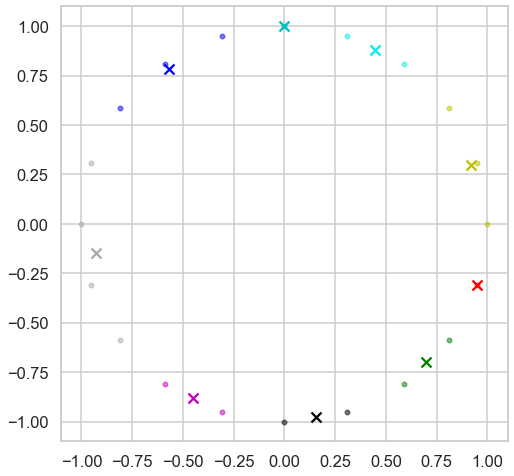

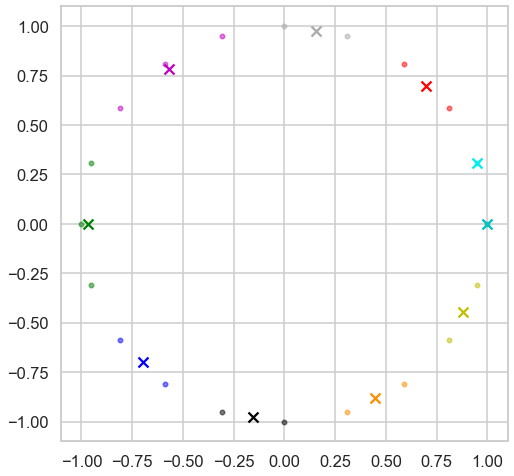

In [11]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
k=2
while(k<=10):
    [ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,k)
    plt.figure()
    display_cluster(X,new_centroids,cluster_assignment,k)
    k=k+1


[11.827308362187718, 6.273506145571168, 3.654616724375439, 2.352528025180428, 1.7113311381648253, 1.2044233758438279, 0.9660938629120402, 0.7277643499802523, 0.584127851661935]


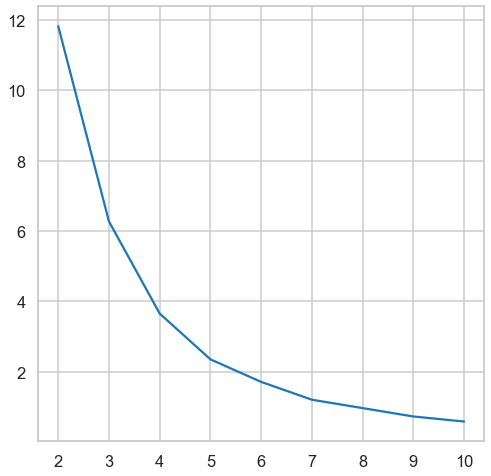

In [103]:
squardistlist=[]
list=[]
j=2
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

while(j<=10):
    k=1
    while(k<=100):
        
        [new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,j)
        squardistlist.append(meansquardist)
        
        

        k=k+1
    list.append(min(squardistlist))
    j=j+1
print(list)
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z,list)



#         plt.figure()
        #         display_cluster(X,new_centroids,cluster_assignment,k)




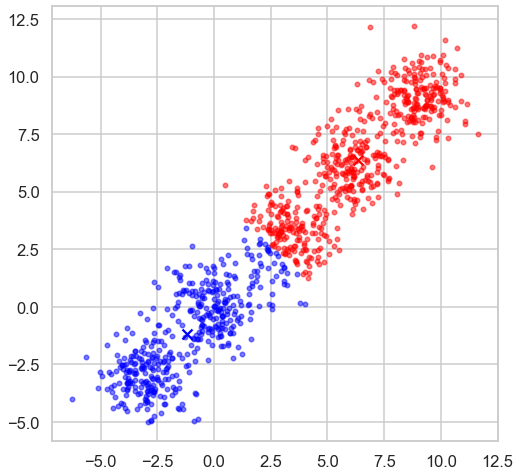

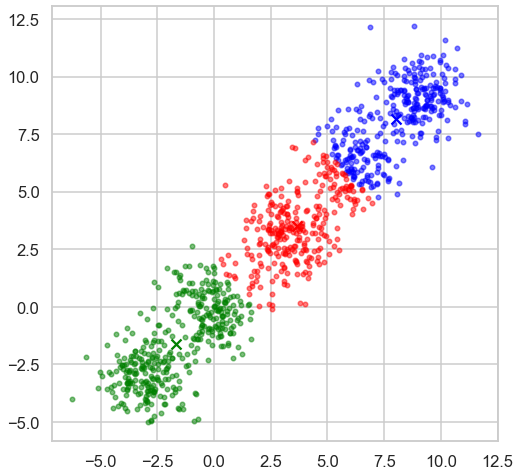

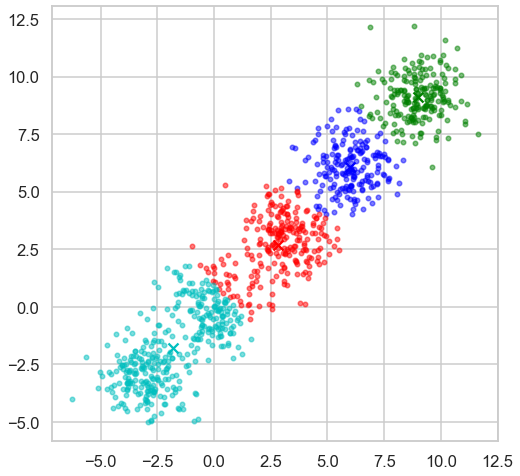

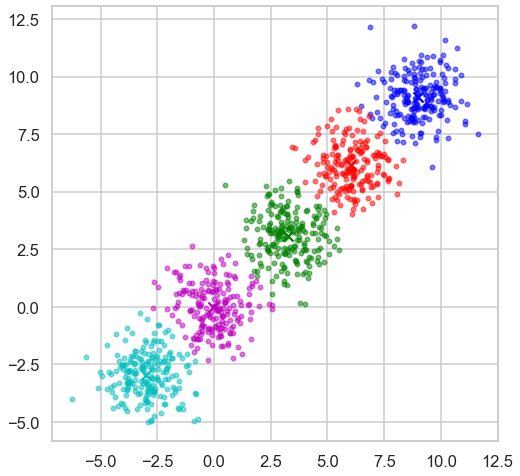

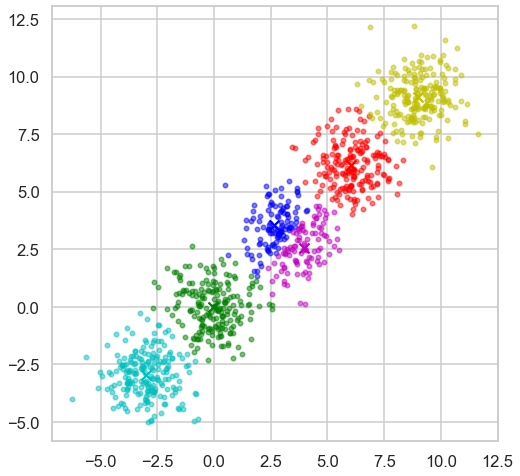

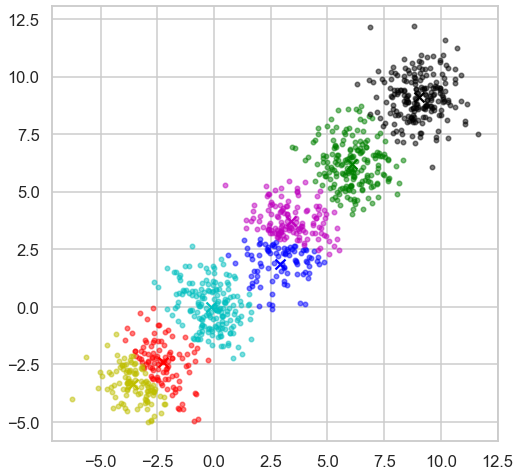

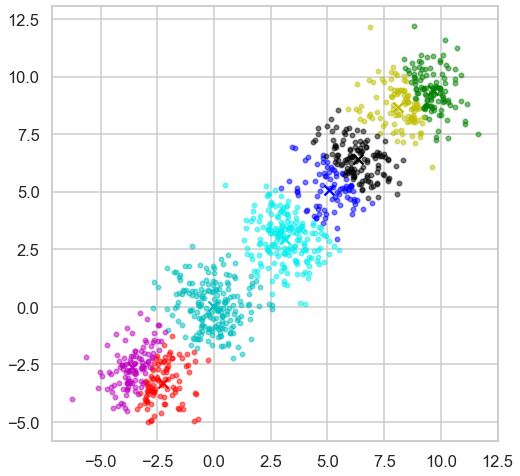

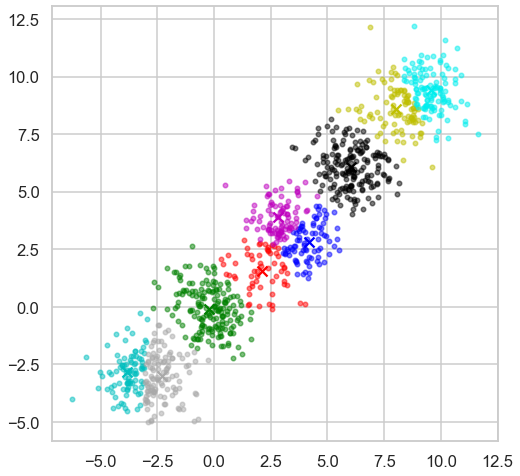

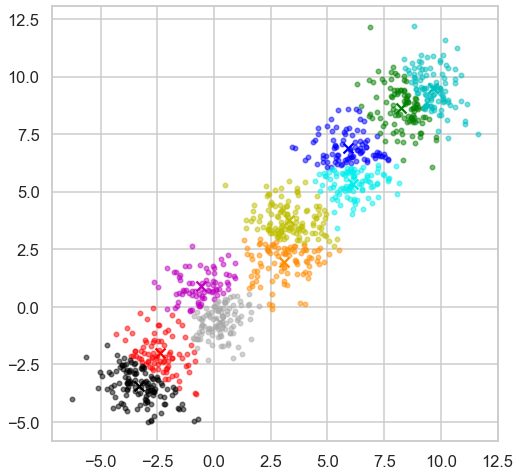

In [13]:
k=2
while(k<=10):
    n_samples = 1000
    n_bins = 4  
    centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
    [ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,k)
    plt.figure()
    display_cluster(X,new_centroids,cluster_assignment,k)
    k=k+1

[10353.898579046901, 4937.314260192345, 3181.087931176235, 1868.9147767478087, 1704.120683606427, 1561.1039080213461, 1418.5579398818293, 1300.8446065254507, 1188.5402470674662]


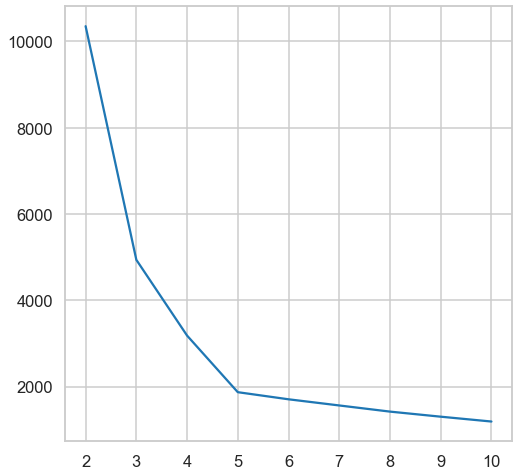

In [14]:
squardistlist=[]
list=[]
j=2
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
while(j<=10):
    k=1
    while(k<=100):
        
        [new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,j)
        squardistlist.append(meansquardist)
        
        

        k=k+1
    list.append(min(squardistlist))
    j=j+1
print(list)
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z,list)



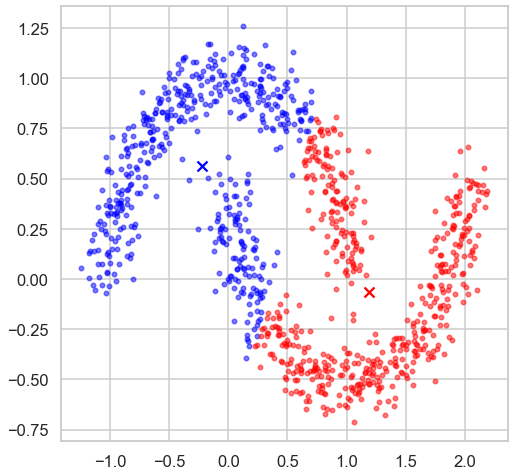

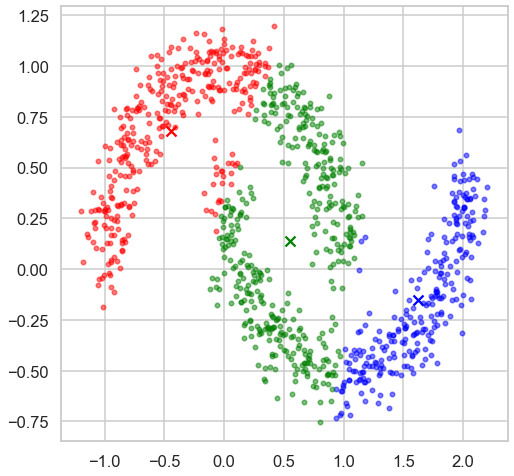

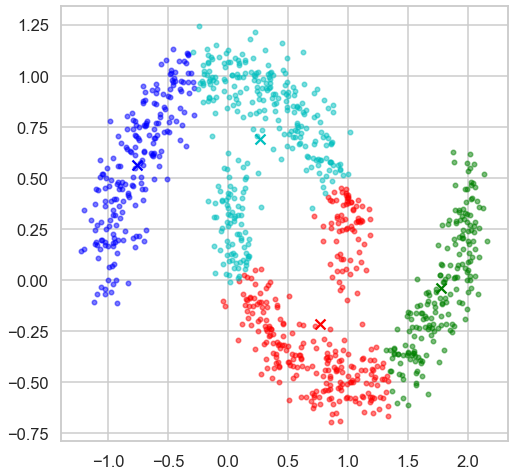

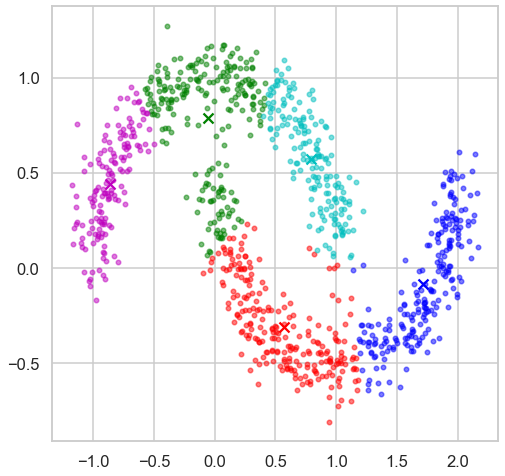

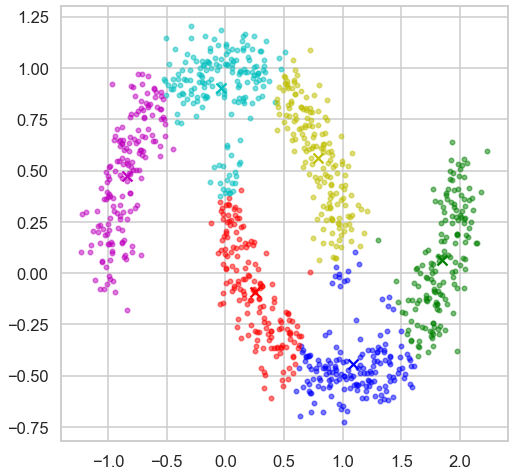

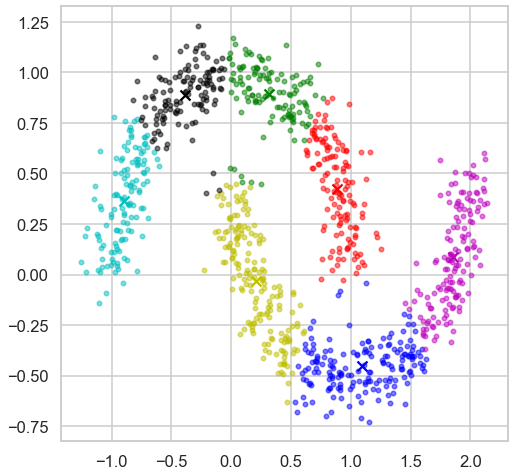

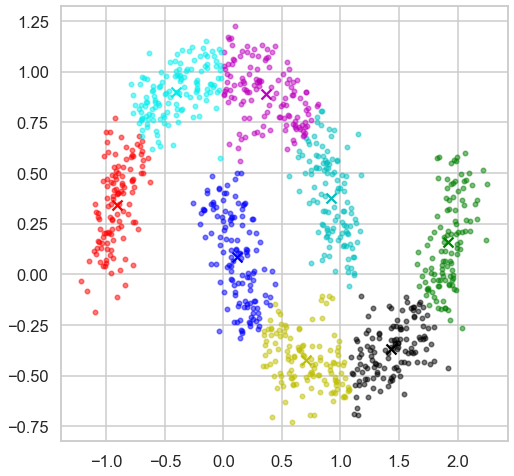

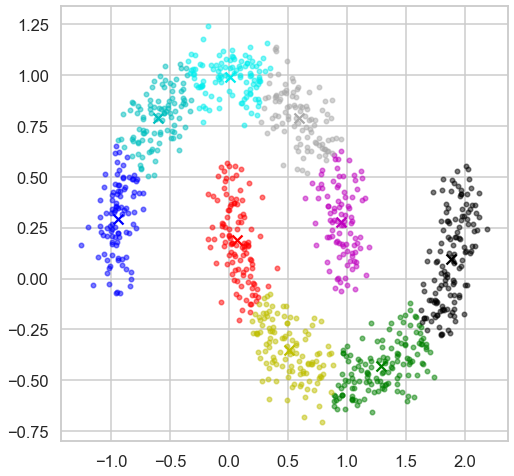

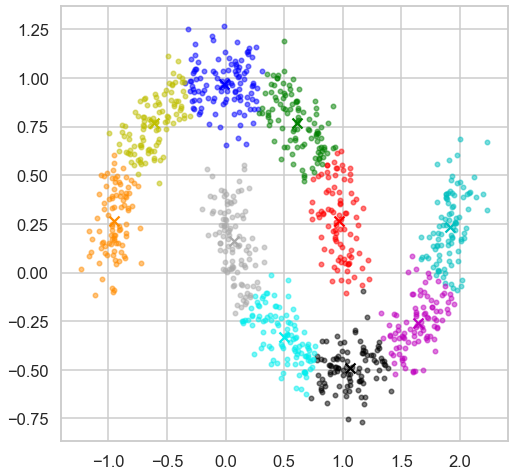

In [15]:
k=2
while(k<=10):
    n_samples = 1000
    X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
    [ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,k)
    plt.figure()
    display_cluster(X,new_centroids,cluster_assignment,k)
    k=k+1

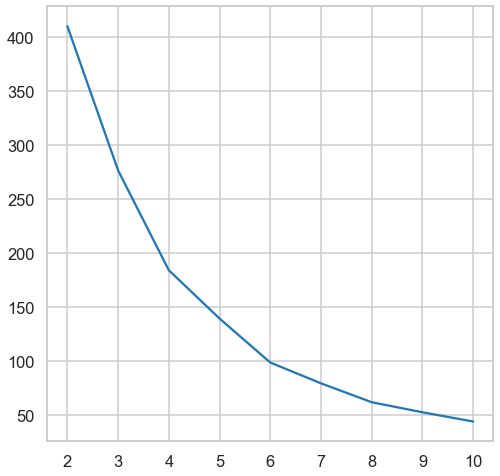

In [16]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
squardistlist=[]
list=[]
j=2
while(j<=10):
    k=1
    while(k<=100):
        
        [new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,j)
        squardistlist.append(meansquardist)
        
        

        k=k+1
    list.append(min(squardistlist))
    j=j+1
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z,list)
    

### . Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

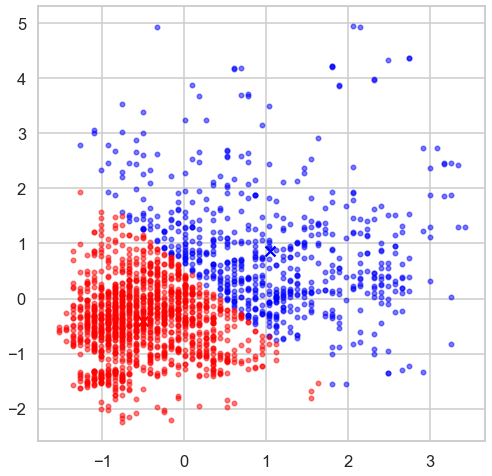

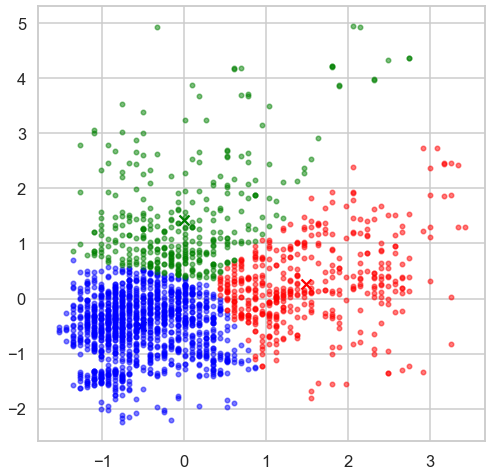

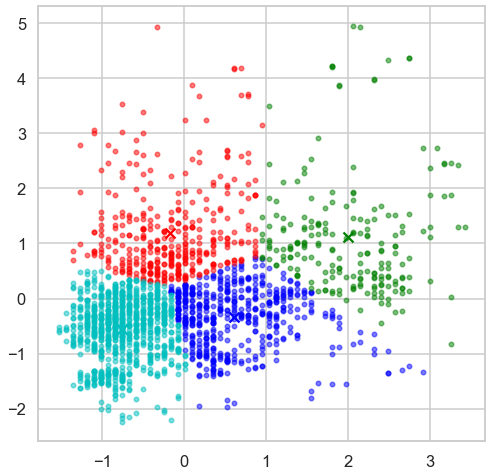

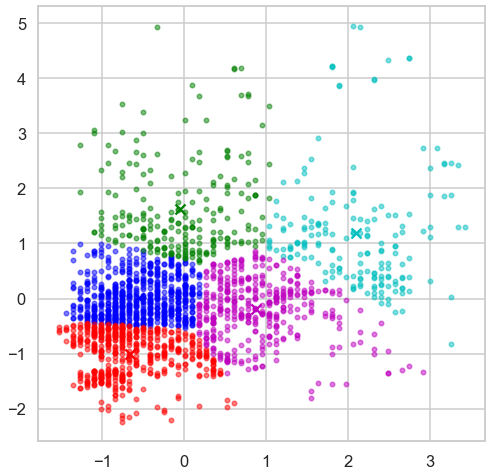

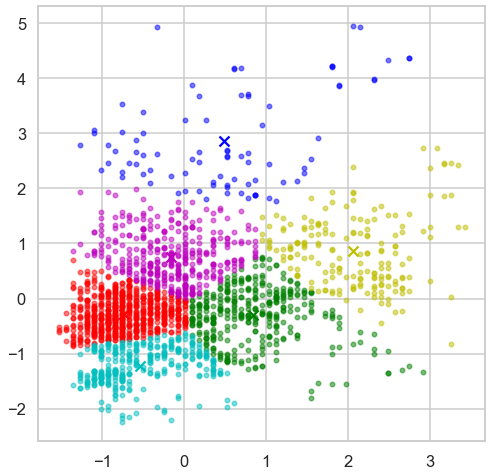

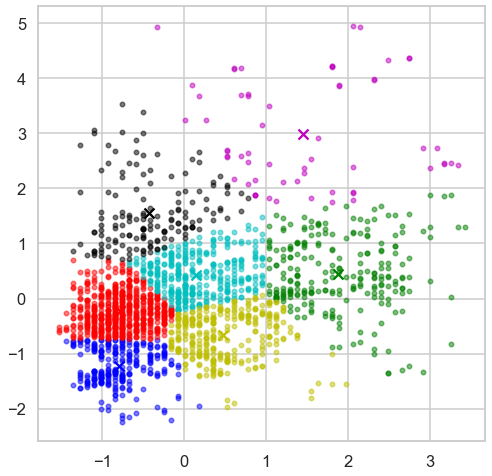

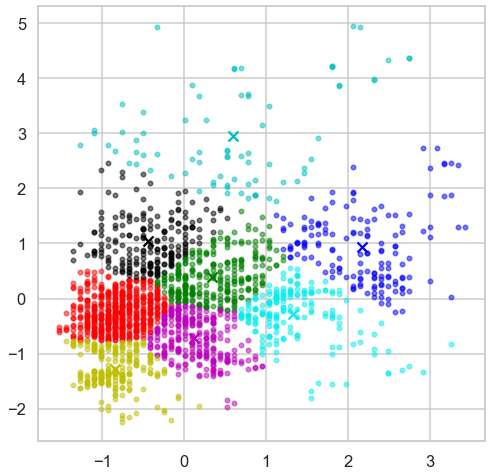

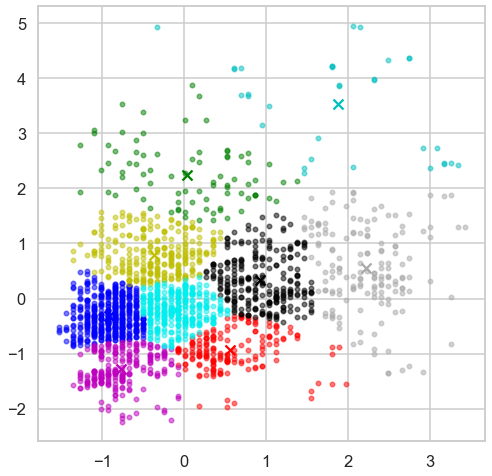

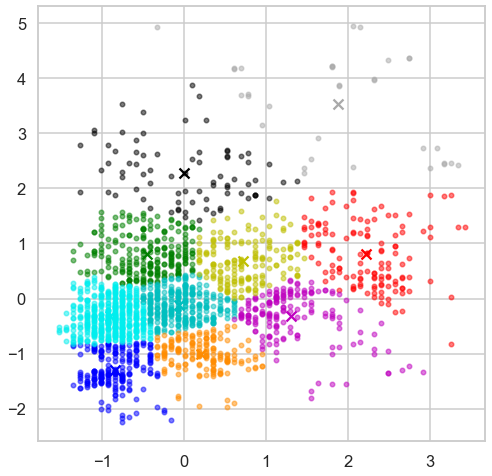

In [100]:
df = pd.read_csv('Customer data.csv',usecols = ['Age','Income'])
    
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
k=2
while(k<=10):
    [ new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,k)
    plt.figure()
    display_cluster(X,new_centroids,cluster_assignment,k)
    k=k+1

               


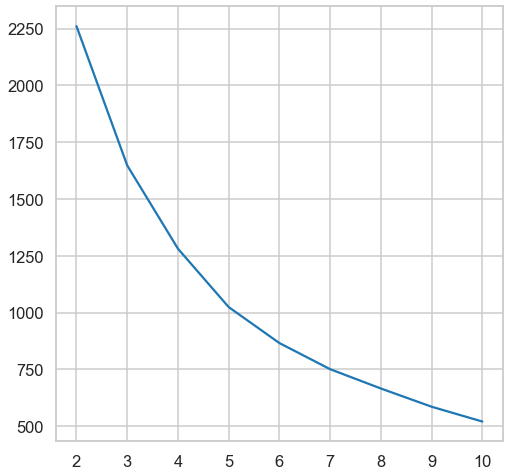

In [102]:
df = pd.read_csv('Customer data.csv',usecols = ['Age','Income'])
    
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
squardistlist=[]
list=[]
j=2
while(j<=10):
    k=1
    while(k<=10):
        
        [new_centroids,cluster_assignment,meansquardist  ]=GUC_Kmean(X,j)
        squardistlist.append(meansquardist)
        
        

        k=k+1
    list.append(min(squardistlist))
    j=j+1
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z,list)
